# Rejection-Inversion for Log-Concave Distributions (RILC) Sampler for Hypergeometric Distribution

In [1]:
import time

import numpy as np
from scipy.special import gammaln
from scipy.optimize import root
from scipy.stats import linregress
import matplotlib.pyplot as plt

import mvhg

In [2]:
def hypergeometric_pmf(N, K, n, k):
    log_pk = (gammaln(K+1) - gammaln(k+1) - gammaln(K-k+1) +
              gammaln(N-K+1) - gammaln(n-k+1) - gammaln(N-K-n+k+1) -
              gammaln(N+1) + gammaln(n+1) + gammaln(N-n+1))
    return np.exp(log_pk)

## Part 1: RILC Sampler Hat Function

In [3]:
N, K, n = 100, 80, 10

In [4]:
km = np.floor((n+1) * (K+1) / (N+2))
ks = np.arange(max(0, n + K - N), min(K,n) + 1)
pks = np.array([hypergeometric_pmf(N, K, n, k) for k in ks])
log_pk = np.log(pks)
xs = np.linspace(ks[0], ks[-1], 500)
log_px = np.interp(xs, ks, log_pk)
px = np.exp(log_px)

In [5]:
px_fun = lambda x: np.exp(np.interp(x, ks, log_pk))
f = lambda x: px_fun(x + 1) / px_fun(x) - (1 + 1/(km - x))
x0 = km * 1.01
x0 = root(f, x0).x.item()

k0 = np.floor(x0 + 1)
pk0 = hypergeometric_pmf(N, K, n, k0)
pk1 = hypergeometric_pmf(N, K, n, k0-1)
b = np.log(pk0) - np.log(pk1)
a = pk0 * np.exp(-b * k0)
hx = a * np.exp(b * xs)

print(f"x0 = {x0}, a = {a}, b = {b}")

x0 = 9.364780704713368, a = 2992.0668436301908, b = -1.0356374895067688


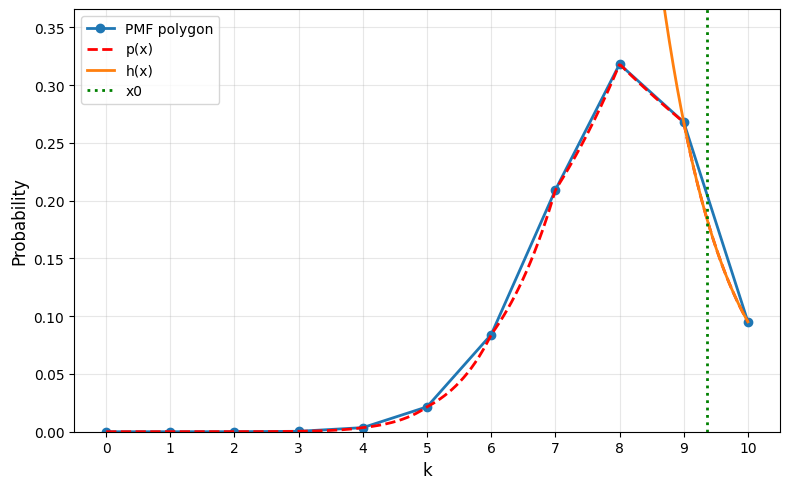

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ks, pks, 'o-', markersize=6, linewidth=2, label='PMF polygon')
ax.plot(xs, px, '--', color='red', linewidth=2, label='p(x)')
ax.plot(xs, hx, linewidth=2, label='h(x)')
ax.axvline(x=x0, color='green', linestyle=':', linewidth=2, label='x0')

ax.set_xlabel('k', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_xticks(np.arange(int(ks[0]), int(ks[-1]) + 1))
ax.tick_params(axis='both', labelsize=10)
ax.legend(frameon=True, fontsize=10)
ax.grid(alpha=0.3)
ax.set_ylim(0, np.max(pks) * 1.15)

fig.tight_layout()
plt.show()

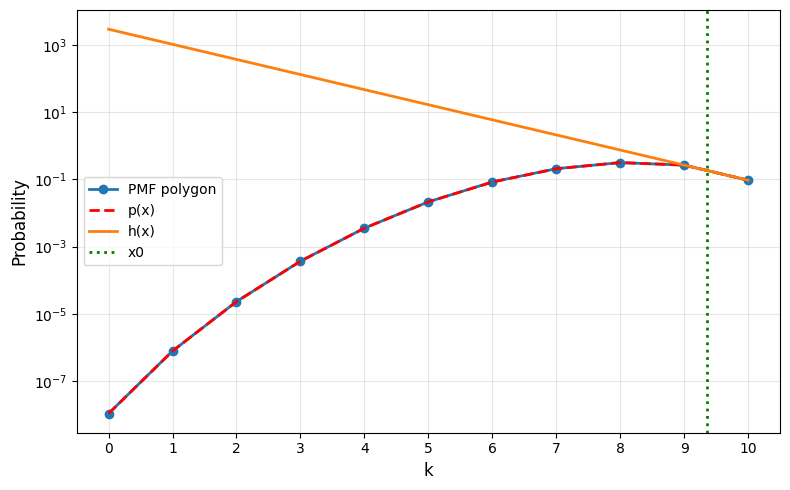

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ks, pks, 'o-', markersize=6, linewidth=2, label='PMF polygon')
ax.plot(xs, px, '--', color='red', linewidth=2, label='p(x)')
ax.plot(xs, hx, linewidth=2, label='h(x)')
ax.axvline(x=x0, color='green', linestyle=':', linewidth=2, label='x0')

ax.set_xlabel('k', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_xticks(np.arange(int(ks[0]), int(ks[-1]) + 1))
ax.tick_params(axis='both', labelsize=10)
ax.legend(frameon=True, fontsize=10)
ax.grid(alpha=0.3)
ax.set_yscale('log')

fig.tight_layout()
plt.show()

## Part 2: RILC Sampler Empirical PMF

In [14]:
N, K, n = 500, 50, 300

In [15]:
num_samples = 1_000_000
samples = mvhg.hypergeometric(N, K, n, num_samples)

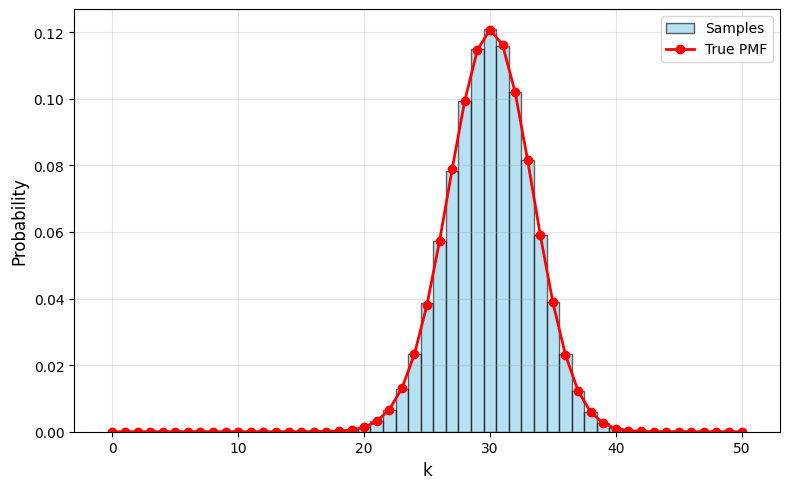

In [ ]:
k_min = max(0, n + K - N)
k_max = min(K, n)
ks = np.arange(k_min, k_max + 1)

pks = np.array([hypergeometric_pmf(N, K, n, k) for k in ks])

fig, ax = plt.subplots(figsize=(8,5))

ax.hist(samples, bins=np.arange(k_min - 0.5, k_max + 1.5, 1),
        density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Samples')
ax.plot(ks, pks, 'o-', color='red', linewidth=2, markersize=6, label='True PMF')

ax.set_xlabel('k', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.tick_params(axis='both', labelsize=10)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
fig.tight_layout()
plt.show()